In [27]:
import pandas as pd
import numpy as np
#from bokeh.charts import BoxPlot, show, defaults, Histogram, Bar
#from bokeh.layouts import row, column
import seaborn  as sns
#from bokeh.charts import BoxPlot, show, defaults, Histogram, Bar
#from bokeh.layouts import row, column
import matplotlib.pyplot as plt
#from IPython.display import Image

import matplotlib.pyplot as plt
# import openpyxl as oxl
import math
import json
import time as t
# experiment
from pylab import rcParams

# from pylab import rcParams
# import everything needed
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
#data_long = pd.read_excel("/Users/dilruba_p/Desktop/dataset_576_long.xlsx")
data_long = pd.read_excel("/Users/haominshi/Desktop/al_data/dataset_576_long.xlsx")
df = data_long.copy()

In [3]:
del df["anemia_who" ]
del df["bun"]
del df["cl"]
del df["co2"]
del df["fasting"]
del df["k"]
del df["na"]
del df["anticoagulant_rx"]
del df["osteoporosis_rx"]
del df["antiasthmatic_rx"]
del df["antihistamine_rx"]
del df["coughcoldallergy_rx"]
del df["nasal_rx"]
del df["alternative_rx"]
del df["cartilage_base_rx"]
del df["fish_oil_supplement_rx"]
del df["glucosamine_rx"]
del df["herbals_rx"]
del df["diabetes_rx"]
del df["antacid_rx"]
del df["antidiarrheal_rx"]
del df["antinausea_rx"]
del df["antireflux_rx"]
del df["laxative_rx"]
del df["musculoskeletal_rx"]
del df["ophthalmic_rx"]
del df["otic_rx"]
del df["respiratory_rx"]
del df["supplement_rx"]
del df["urinary_rx"]
del df["acetaminophen_rx"]
del df["antiinfective_rx"]
del df["vaccine_rx"]
del df["antiarrhythmic_rx"]
del df["rdw"]
del df["tga"]
del df["tsh"]
del df["wbc"]
del df["confid_health"]
del df["confid_instit"]
del df["finfintot"]
del df["finhlthtot"]
del df["finuctot"]
del df["fraud7"]
del df["scam"]
del df["gamma"]
del df["risk"]
del df["large_alpha"]
del df["small_alpha"]
del df["fin_literacy_pct"]
del df["health_literacy_pct"]
del df["literacy_total_pct"]
del df["thyroid_cum"]
del df["chf_cum"]
del df["heart_cum"]
del df["antibiotic_rx"]
del df["antihyp_all_rx"]
del df["antineoplastic_rx"]
del df["cardiac_rx"]
del df["dental_rx"]
del df["dermatologic_rx"]
del df["endocrine_rx"]
del df["gastrointestinal_rx"]
del df["hemotologic_rx"]
del df["lipid_lowering_rx"]

In [5]:
#medications with analgesic_rx
df = df[df.analgesic_rx !=1]
#removing people who have a suspected of having head injuries in past visits 
df = df[df.headinjrloc_cum !=1]
#removing people who have a suspected of having cancer in past visits 
df = df[df.cancer_cum !=1]
#removing people who have a suspected of having diabetes in past visits 
df = df[df.dm_cum !=1]
print(df.shape)

##there might be other 

(3594, 138)


In [41]:
def groupbyid(df):
    
    #create a list of dataframes, each element of the list contains a dataframe
    #that is grouped by ID

    # convert the values from the projid to a list
    projid_all = df.projid.unique()
    projid_list = projid_all.tolist() # a unique list of ID  acquired 

    patient_dfbyid = []
    start_df_row = 0 # selecting the first row 
    end_df_row   = 0 # selecting the last row
    flag_start   = 0 # start index for df spliting based on unique ID
    df = df.reset_index(drop = True) # df reindexed

   
    for p_id in projid_all: # loop through the unique id list
        for df_index in range(flag_start, df.shape[0]): 
            if df.iloc[df_index]['projid'] == p_id:
                end_df_row += 1
            elif df.iloc[df_index]['projid'] != p_id:
                break
      
        patient_dfbyid.append(df[start_df_row: end_df_row])
        start_df_row = end_df_row
        flag_start = end_df_row

   
    return patient_dfbyid # a list of df, that each element of the list is one patient
#-------------------------------------------------------------------------------------------------
def patient_diagnosis(patient_dfbyid):
 
    patient_dfbyid_diagnosed = []      #  diagnosed with alzheimer
    patient_dfbyid_not_diagnosed = []  # not diagnalzheimer
    diagonosed = False

    for patient in list_of_patient:
        dcfdx_list = patient['dcfdx'].tolist()
        for dcfdx_element in dcfdx_list:
            if dcfdx_element >= 4: # >= 4 means diagnoised
                diagonosed = True
                break
        if (diagonosed) == True:
            patient_dfbyid_diagnosed.append(patient)
            diagonosed= False
        else:
            patient_dfbyid_not_diagnosed.append(patient)
    
    return patient_dfbyid_diagnosed, patient_dfbyid_not_diagnosed

#-----------------------------------------

def group_bydcfdxlevel(df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 4
    dcfdx_split = 4  
    df=pd.DataFrame(df)
    df = df.reset_index(drop = True)  
    
    df_column_names = list(df)
    total_rows = df.shape[0]

    diagnosed_level = pd.DataFrame(columns=df_column_names) 
    not_diagnosed_level= pd.DataFrame(columns=df_column_names)

    for row in range(0, total_rows):  # loop through all the rows in the DF
        if df.iloc[row]['dcfdx'] >= dcfdx_split:
            # takes rows  with dcfdx level  greater or equal to 4
            diagnosed_level = diagnosed_level.append(df.iloc[row], ignore_index= True)
        elif df.iloc[row]['dcfdx'] < dcfdx_split:
            # get the df row that is smaller than 4
            not_diagnosed_level = not_diagnosed_by_level.append(df.iloc[row], ignore_index= True)
        else:
            continue
    
    return diagnosed_level, not_diagnosed_level

def imputemean_per_id(list_of_df_temp,focus = "crn"):
    for df in list_of_df_temp:
        M = df[focus].mean()
        df[focus].fillna(M,inplace=True)
          
    return list_of_df_temp

def output_table_xlsx(df, output_filename): # dataframe, string
    """
    helper function to output df back to xlsx
    to get a better view of all the columns
    """
    writer_excel = pd.ExcelWriter(output_filename + ".xlsx")
    df.to_excel(writer_excel, 'Sheet1')
    print ("file created")
    
def appending_initial_df_to_full_df(list_of_df):
    list_of_df_copy = list_of_df[:]
    counter = 0
    for df in list_of_df_copy[1:]:
        counter+=1
        print("appending{}".format(counter))
        list_of_df_copy[0] = list_of_df_copy[0].append(df, ignore_index=True)
    return list_of_df_copy[0]

# df_everypatient
def single_out_age_group2(result_list_of_df, fu_year_lvl = 1, age_at_visit_low_level = 80,\
                         age_at_visit_high_level = 90, dcfdx_level = 2):
    """
    def single_out_age_group2(result_list_of_df, fu_year_lvl = 1, age_at_visit_low_level = 80,\
                         age_at_visit_high_level = 90, dcfdx_level = 2):
    """
    #pd.DataFrame(columns=df_column_names)
    df_column_names = list(result_list_of_df[0]) # get the name and create a new empty DF for return
    return_dataframe = pd.DataFrame(columns = df_column_names)
    for each_dataframe in result_list_of_df:
        for row_number in range(each_dataframe.shape[0]):
            if each_dataframe.iloc[row_number]["fu_year"] == fu_year_lvl and \
            age_at_visit_low_level <= each_dataframe.iloc[row_number]["age_at_visit"] < age_at_visit_high_level and \
            each_dataframe.iloc[row_number]["dcfdx"]==dcfdx_level:
                return_dataframe = \
                return_dataframe.append(each_dataframe.iloc[row_number], ignore_index = True)
            else:
                pass
    return return_dataframe

In [7]:
list_of_patient = groupbyid(df)
print("DF grouped dtype = list, total patient count is: " \
+ str(len(list_of_patient)))

# 2 very important asset, all the manipulation use these 2
patient_dfbyid_diagnosed, patient_dfbyid_not_diagnosed = \
patient_diagnosis(list_of_patient)
print("Patients diagnosed with or without the disease are separeted into 2" )
print("Number of patient diagnosed with Alz = " + str(len(patient_dfbyid_diagnosed)))
print("Number of patients  not diagnosed with Alz = " + str(len(patient_dfbyid_not_diagnosed)))

DF grouped dtype = list, total patient count is: 1189
Patients diagnosed with or without the disease are separeted into 2
Number of patient diagnosed with Alz = 271
Number of patients  not diagnosed with Alz = 918


In [20]:
list_of_patient_oper = list_of_patient[:]
imputed_df_list=imputemean_per_id(list_of_patient_oper)
print(imputed_df_list)

[   projid study  fu_year scaled_to   ca  chlstrl    crn   gfr_mdrs  glucose  \
0    9121  MAP         1    ROSMAP  NaN      NaN  0.878        NaN      NaN   
1    9121  MAP         2    ROSMAP  9.4    205.0  0.980  57.803255     77.0   
2    9121  MAP         3    ROSMAP  9.4    230.0  0.890  64.444732     85.0   
3    9121  MAP         4    ROSMAP  9.2    210.0  0.820  70.657593     92.0   
4    9121  MAP         5    ROSMAP  8.8    201.0  0.850  67.625681     85.0   
5    9121  MAP         6    ROSMAP  9.1    231.0  0.850  67.463788     95.0   

   hba1c       ...        other_dietary_rx  vitamin_minerals_rx  vitamin_rx  \
0    NaN       ...                     0.0                  1.0         1.0   
1    5.5       ...                     0.0                  1.0         0.0   
2    5.5       ...                     0.0                  1.0         0.0   
3    6.1       ...                     0.0                  1.0         0.0   
4    5.9       ...                     0.0        

In [23]:
list_of_columns = ['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl', 'mch', 'mchc', 'mcv', 'platelet','rbc']
"""
loop through the list of columns, and replace the nan in that column with the local mean of that patient
"""
analysis_result_DF_list = []
counter = 0
for column_names in list_of_columns:
    print("looped {}".format(column_names))
    result_list_of_df = imputemean_per_id(list_of_patient,column_names)

looped chlstrl
looped crn
looped gfr_mdrs
looped glucose
looped hba1c
looped hdlchlstrl
looped hdlratio
looped hemacrit
looped hemoglbn
looped ldlchlstrl
looped mch
looped mchc
looped mcv
looped platelet
looped rbc


In [32]:
df_everypatient = appending_initial_df_to_full_df(result_list_of_df)

appending1
appending2
appending3
appending4
appending5
appending6
appending7
appending8
appending9
appending10
appending11
appending12
appending13
appending14
appending15
appending16
appending17
appending18
appending19
appending20
appending21
appending22
appending23
appending24
appending25
appending26
appending27
appending28
appending29
appending30
appending31
appending32
appending33
appending34
appending35
appending36
appending37
appending38
appending39
appending40
appending41
appending42
appending43
appending44
appending45
appending46
appending47
appending48
appending49
appending50
appending51
appending52
appending53
appending54
appending55
appending56
appending57
appending58
appending59
appending60
appending61
appending62
appending63
appending64
appending65
appending66
appending67
appending68
appending69
appending70
appending71
appending72
appending73
appending74
appending75
appending76
appending77
appending78
appending79
appending80
appending81
appending82
appending83
appending84
a

appending671
appending672
appending673
appending674
appending675
appending676
appending677
appending678
appending679
appending680
appending681
appending682
appending683
appending684
appending685
appending686
appending687
appending688
appending689
appending690
appending691
appending692
appending693
appending694
appending695
appending696
appending697
appending698
appending699
appending700
appending701
appending702
appending703
appending704
appending705
appending706
appending707
appending708
appending709
appending710
appending711
appending712
appending713
appending714
appending715
appending716
appending717
appending718
appending719
appending720
appending721
appending722
appending723
appending724
appending725
appending726
appending727
appending728
appending729
appending730
appending731
appending732
appending733
appending734
appending735
appending736
appending737
appending738
appending739
appending740
appending741
appending742
appending743
appending744
appending745
appending746
appending747

/Users/dilruba_p/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


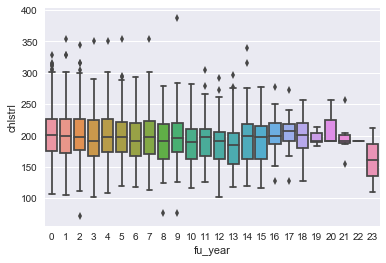

In [32]:
ax = sns.boxplot(x="fu_year", y="chlstrl", data=df_everypatient)

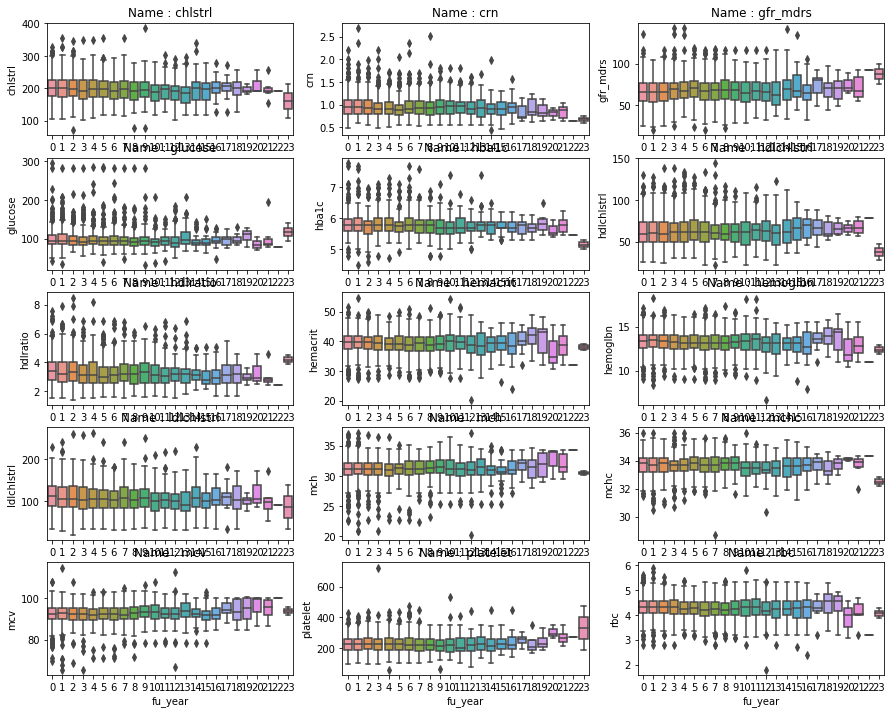

In [33]:
fig = plt.figure(figsize=(15,12))
i = 1
for name in list_of_columns:
    fig.add_subplot(5, 3, i)
    plt.title('Name : {}'.format(name))
    sns.boxplot(x="fu_year", y=name, data=df_everypatient)
    i += 1

In [36]:
temp_list = result_list_of_df[:]
patient_dfbyid_diagnosed, patient_dfbyid_not_diagnosed = \
patient_diagnosis(temp_list)

print(patient_dfbyid_diagnosed[0])
print("=================")
print(patient_dfbyid_not_diagnosed[0])

    projid study  fu_year scaled_to   ca  chlstrl   crn   gfr_mdrs  glucose  \
6   285563  MAP         2    ROSMAP  9.9    230.0  0.80  72.199053     85.0   
7   285563  MAP         5    ROSMAP  9.4    263.0  0.86  65.968070     94.0   
8   285563  MAP         6    ROSMAP  9.4    276.0  0.99  55.950658    105.0   
9   285563  MAP         7    ROSMAP  9.3    232.0  0.78  73.503240     94.0   
10  285563  MAP         9    ROSMAP  9.7    246.0  0.90  62.042574     86.0   

    hba1c       ...        other_dietary_rx  vitamin_minerals_rx  vitamin_rx  \
6   5.575       ...                     0.0                  1.0         0.0   
7   5.600       ...                     0.0                  1.0         0.0   
8   5.600       ...                     0.0                  0.0         0.0   
9   5.500       ...                     0.0                  0.0         0.0   
10  5.600       ...                     0.0                  0.0         0.0   

    alphablocker_rx  benign_pros_hyper_rx  b

In [37]:
#for column_names in list_of_columns:
#    print("looped {}".format(column_names))
#list_of_columns
list_of_columns = ['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc']
def getbloodanalysis(list_of_df, target = ""):
    list_of_df_copy= list_of_df[:]
    temp_list = []
    for df in  list_of_df_copy:
        temp_list.append(df.iloc[0][target])
    return temp_list # number list

#for df in result_list_of_df:
#    print(df.iloc[0]["chlstrl"])
holderList = []
for names in list_of_columns:
    holderList.append(getbloodanalysis(result_list_of_df,names))


print(len(holderList))

temp_df = pd.DataFrame({
    "chlstrl": holderList[0],
    "crn" : holderList[1],
    "gfr_mdrs" : holderList[2],
    "glucose" : holderList[3],
    "hba1c" : holderList[4],
    "hdlchlstrl" : holderList[5],
    "hdlratio'" : holderList[6],
    "hemacrit'" : holderList[7],
    "hemoglbn" : holderList[8],
    "ldlchlstrl" : holderList[9],
    "mch" : holderList[10],
    "mchc'" : holderList[11],
    "mcv" : holderList[12],
    "platelet" : holderList[13],
    "rbc" : holderList[14],
   
    
})

15


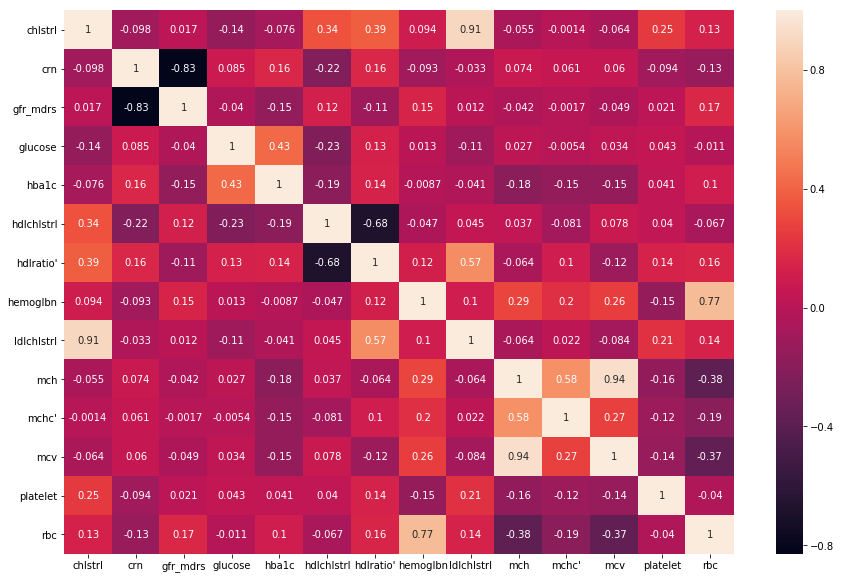

In [38]:
rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = temp_df.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio\'','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc\'',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

In [45]:
help(single_out_age_group2)
working_df_for_this_cell2 = single_out_age_group2(result_list_of_df, 1, 80,90,2)

Help on function single_out_age_group2 in module __main__:

single_out_age_group2(result_list_of_df, fu_year_lvl=1, age_at_visit_low_level=80, age_at_visit_high_level=90, dcfdx_level=2)
    def single_out_age_group2(result_list_of_df, fu_year_lvl = 1, age_at_visit_low_level = 80,                         age_at_visit_high_level = 90, dcfdx_level = 2):



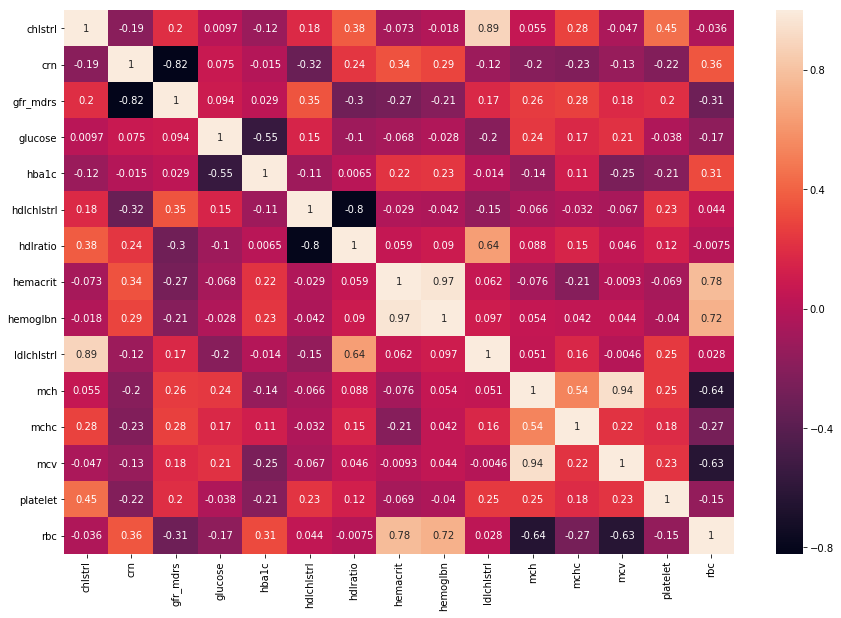

In [46]:
#grouped bar chart 
rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = working_df_for_this_cell2.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

102


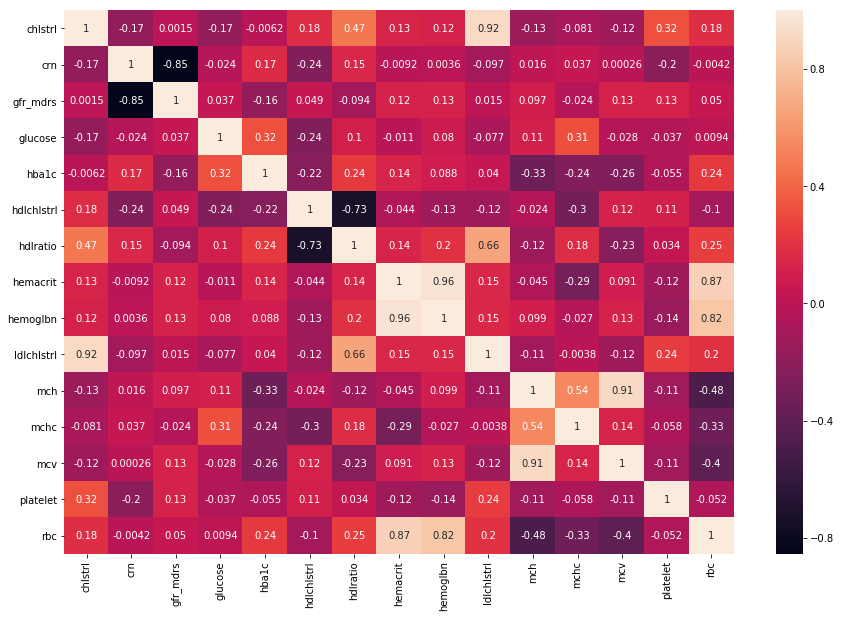

In [47]:
working_df_for_this_cell2 = single_out_age_group2(result_list_of_df,1,80,90,1)
print(len(working_df_for_this_cell2))
rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = working_df_for_this_cell2.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)

286


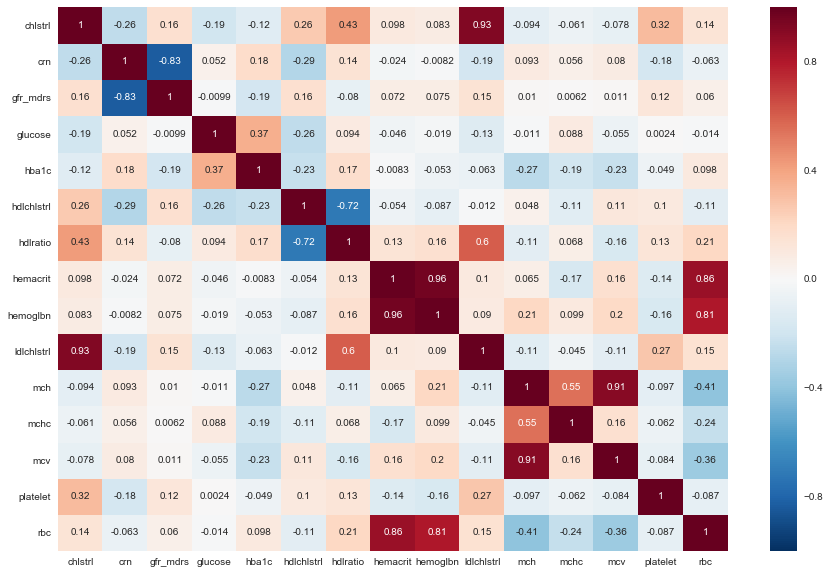

In [63]:
working_df_for_this_cell3 = single_out_age_group2(result_list_of_df)
print(len(working_df_for_this_cell2))
rcParams['figure.figsize'] = 5, 5
##df2= pd.DataFrame(analysis_result_DF_list[0])
Bloodmeasure = working_df_for_this_cell2.filter(['chlstrl','crn','gfr_mdrs','glucose','hba1c','hdlchlstrl', 'hdlratio','hemacrit','hemoglbn',
'ldlchlstrl',
'mch',
'mchc',
'mcv',
'platelet', 'rbc'], axis=1)

corr_matrix =Bloodmeasure.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix,annot=True)